# Módulo 30 - K-Means
**Atividade:**

Nesta tarefa, vamos explorar o algoritmo de clustering K-means aplicado a um contexto diferente do usual. Em vez de segmentar perfis de viajantes ou clientes de e-commerce, vamos usar dados biológicos para segmentar diferentes espécies de pinguins com base em características físicas. Esta abordagem destaca a versatilidade do K-means para diversas áreas além de vendas e marketing.

A base de dados utilizada é a penguins do pacote seaborn, que contém informações sobre três espécies de pinguins: Adelie, Chinstrap e Gentoo. As variáveis disponíveis incluem medições físicas dos pinguins coletadas na Antártica.

species: Espécie do pinguim (Adelie, Chinstrap, Gentoo)

island: Ilha onde o pinguim foi observado (Biscoe, Dream, Torgersen)

bill_length_mm: Comprimento do bico em milímetros

bill_depth_mm: Profundidade do bico em milímetros

flipper_length_mm: Comprimento da barbatana em milímetros

body_mass_g: Massa corporal em gramas

sex: Sexo do pinguim (Male, Female)

year: Ano em que a observação foi feita

In [1]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

In [3]:
penguins = sns.load_dataset('penguins')

In [4]:
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


# 1 - Nesse exercício vocês devem verificar se temos variáveis missing, faltantes e excluir esses valores do dataset, também devem excluir as colunas com valores categóricos, que não utilizazam para o Kmeans.

In [6]:
# seu código aqui
# Verificar valores faltantes
print(penguins.isnull().sum())

# Excluir linhas com valores faltantes
penguins_clean = penguins.dropna()

# Selecionar apenas as colunas numéricas (retirando categóricas)
penguins_num = penguins_clean.drop(columns=['species','island','sex'])
penguins_num.head()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
4,36.7,19.3,193.0,3450.0
5,39.3,20.6,190.0,3650.0


# 2 - Visualize a análise descritiva dos seus dados utilizando a função vista em aula pairplot. É possível já identificar possíveis agrupamentos? Se sim, quantos?

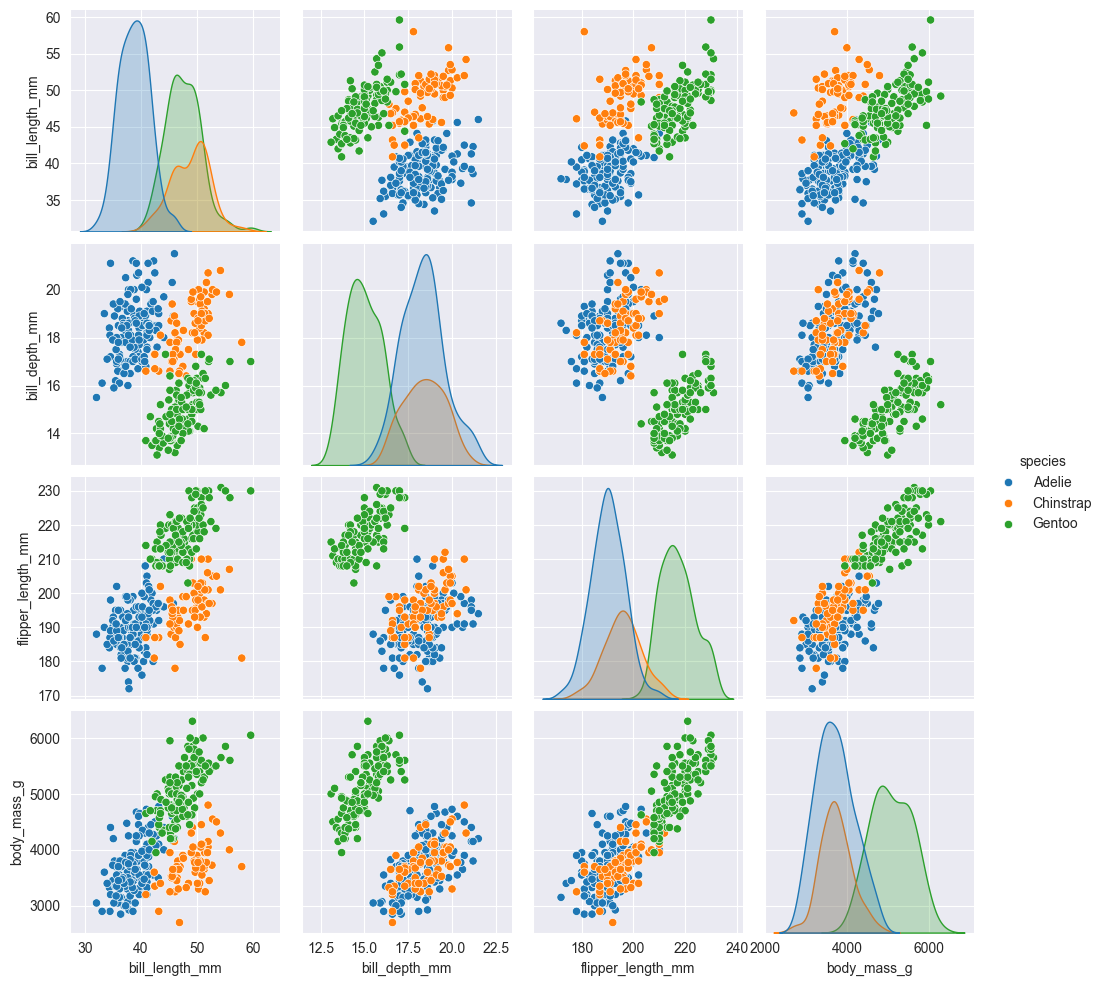

In [7]:
# seu código aqui
sns.pairplot(penguins_clean, hue="species")
#três agrupamentos relativamente distintos:
#Gentoo (separado por maior massa corporal e barbatana mais longa)
#Adelie e Chinstrap (com sobreposição, mas diferenças em bico: comprimento/profundidade)

# 3 - Realize a padronização dos dados e visualize os dados.

In [8]:
# seu código aqui
scaler = StandardScaler()
penguins_scaled = scaler.fit_transform(penguins_num)

penguins_scaled_df = pd.DataFrame(
    penguins_scaled,
    columns=penguins_num.columns
)
penguins_scaled_df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,-0.896042,0.780732,-1.426752,-0.568475
1,-0.822788,0.119584,-1.069474,-0.506286
2,-0.676280,0.424729,-0.426373,-1.190361
3,-1.335566,1.085877,-0.569284,-0.941606
4,-0.859415,1.747026,-0.783651,-0.692852


# 4 - Aplique o algoritmo do k means escolhendo o numero de clusters como igual a 3, que é que a quantidade de espécies que temos na base.

In [9]:
# seu código aqui
kmeans = KMeans(n_clusters=3, random_state=42)
penguins_clean["cluster"] = kmeans.fit_predict(penguins_scaled)

# Centroides
centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=penguins_num.columns
)
centroids

C:\Users\joao gouvea\AppData\Local\Temp\ipykernel_6560\2628094434.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  penguins_clean["cluster"] = kmeans.fit_predict(penguins_scaled)


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
0,38.276744,18.121705,188.627907,3593.798450
1,47.568067,14.996639,217.235294,5092.436975
2,47.662353,18.748235,196.917647,3898.235294


# 5 - Construa pelo 2 matriz de dispersão como realizada em aula indicando os pontos e centroides.

**Comece usando x='bill_length_mm' e y='bill_depth_mm' para analisar o primeiro gráfico e em seguida escolha outras variaveis para o segundo.**

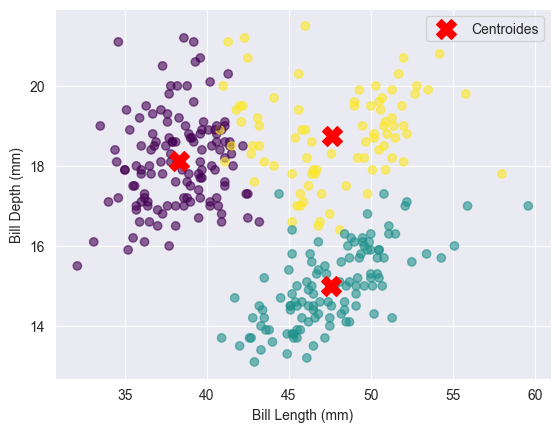

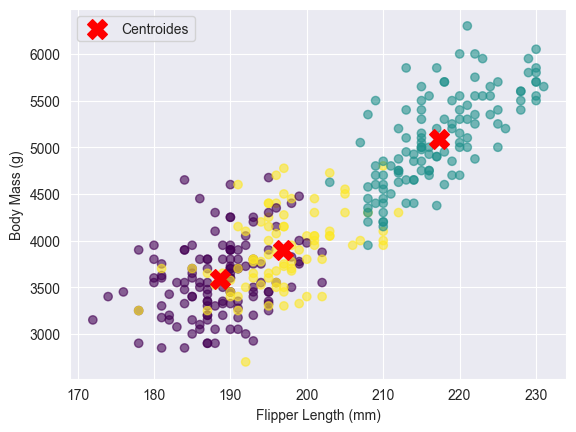

In [11]:
# seu código aqui
import matplotlib.pyplot as plt

# Primeiro gráfico: comprimento x profundidade do bico
plt.scatter(penguins_clean['bill_length_mm'], penguins_clean['bill_depth_mm'],
            c=penguins_clean['cluster'], cmap='viridis', alpha=0.6)
plt.scatter(centroids['bill_length_mm'], centroids['bill_depth_mm'],
            c='red', marker='X', s=200, label="Centroides")
plt.xlabel("Bill Length (mm)")
plt.ylabel("Bill Depth (mm)")
plt.legend()
plt.show()

# Segundo gráfico: comprimento da barbatana x massa corporal
plt.scatter(penguins_clean['flipper_length_mm'], penguins_clean['body_mass_g'],
            c=penguins_clean['cluster'], cmap='viridis', alpha=0.6)
plt.scatter(centroids['flipper_length_mm'], centroids['body_mass_g'],
            c='red', marker='X', s=200, label="Centroides")
plt.xlabel("Flipper Length (mm)")
plt.ylabel("Body Mass (g)")
plt.legend()
plt.show()

# 6 - Pesquise mais 3 utilidades de aplicações de algoritmos de clusterização e cite abaixo:

#Medicina e Biologia → Segmentação de pacientes por características clínicas ou genéticas para #identificar grupos de risco e possíveis tratamentos personalizados.

#Ciência Ambiental → Agrupar áreas geográficas por características de solo, clima e #biodiversidade para apoiar políticas ambientais.

#Segurança e Detecção de Fraudes → Identificar padrões anômalos em transações financeiras que #não se encaixam em clusters normais.